# Import all required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
import datetime

sns.set()

# Get the data
Let's read the data and gather some basic information. For example the shape of the data, the data types of the various columns in the dataset, and the number of unique values for some categorical variables.

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
weather_data = pd.read_csv("/kaggle/input/global-weather-repository/GlobalWeatherRepository.csv")
weather_data.head()

,country,location_name,latitude,longitude,timezone,last_updated_epoch,last_updated,temperature_celsius,temperature_fahrenheit,condition_text,wind_mph,wind_kph,wind_degree,wind_direction,pressure_mb,pressure_in,precip_mm,precip_in,humidity,cloud,feels_like_celsius,feels_like_fahrenheit,visibility_km,visibility_miles,uv_index,gust_mph,gust_kph,air_quality_Carbon_Monoxide,air_quality_Ozone,air_quality_Nitrogen_dioxide,air_quality_Sulphur_dioxide,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,sunrise,sunset,moonrise,moonset,moon_phase,moon_illumination
0,Afghanistan,Kabul,34.52,69.18,Asia/Kabul,1715849100,2024-05-16 13:15,26.6,79.8,Partly Cloudy,8.3,13.3,338,NNW,1012.0,29.89,0.0,0.00,24,30,25.3,77.5,10.0,6.0,7.0,9.5,15.3,277.0,103.0,1.1,0.2,8.4,26.6,1,1,04:50 AM,06:50 PM,12:12 PM,01:11 AM,Waxing Gibbous,55
1,Albania,Tirana,41.33,19.82,Europe/Tirane,1715849100,2024-05-16 10:45,19.0,66.2,Partly cloudy,6.9,11.2,320,NW,1012.0,29.88,0.1,0.00,94,75,19.0,66.2,10.0,6.0,5.0,11.4,18.4,193.6,97.3,0.9,0.1,1.1,2.0,1,1,05:21 AM,07:54 PM,12:58 PM,02:14 AM,Waxing Gibbous,55
2,Algeria,Algiers,36.76,3.05,Africa/Algiers,1715849100,2024-05-16 09:45,23.0,73.4,Sunny,9.4,15.1,280,W,1011.0,29.85,0.0,0.00,29,0,24.6,76.4,10.0,6.0,5.0,13.9,22.3,540.7,12.2,65.1,13.4,10.4,18.4,1,1,05:40 AM,07:50 PM,01:15 PM,02:14 AM,Waxing Gibbous,55
3,Andorra,Andorra La Vella,42.50,1.52,Europe/Andorra,1715849100,2024-05-16 10:45,6.3,43.3,Light drizzle,7.4,11.9,215,SW,1007.0,29.75,0.3,0.01,61,100,3.8,38.9,2.0,1.0,2.0,8.5,13.7,170.2,64.4,1.6,0.2,0.7,0.9,1,1,06:31 AM,09:11 PM,02:12 PM,03:31 AM,Waxing Gibbous,55
4,Angola,Luanda,-8.84,13.23,Africa/Luanda,1715849100,2024-05-16 09:45,26.0,78.8,Partly cloudy,8.1,13.0,150,SSE,1011.0,29.85,0.0,0.00,89,50,28.7,83.6,10.0,6.0,8.0,12.5,20.2,2964.0,19.0,72.7,31.5,183.4,262.3,5,10,06:12 AM,05:55 PM,01:17 PM,12:38 AM,Waxing Gibbous,55


In [4]:
weather_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47162 entries, 0 to 47161
Data columns (total 41 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       47162 non-null  object 
 1   location_name                 47162 non-null  object 
 2   latitude                      47162 non-null  float64
 3   longitude                     47162 non-null  float64
 4   timezone                      47162 non-null  object 
 5   last_updated_epoch            47162 non-null  int64  
 6   last_updated                  47162 non-null  object 
 7   temperature_celsius           47162 non-null  float64
 8   temperature_fahrenheit        47162 non-null  float64
 9   condition_text                47162 non-null  object 
 10  wind_mph                      47162 non-null  float64
 11  wind_kph                      47162 non-null  float64
 12  wind_degree                   47162 non-null  int64  
 13  w

In [5]:
weather_data.shape

(47162, 41)

In [6]:
weather_data["country"].nunique()

210

In [7]:
weather_data["location_name"].nunique()

248

In [8]:
weather_data["timezone"].nunique()

190

In [9]:
weather_data["last_updated"].nunique()

7867

# EDA

There are multiple countries and locations in our dataset, but they are all characterized or represented by the latitude and longitude of the place. The name of the country or location becomes irrelevant once we look at the latitude and logitudes of the area. I will pick the feature temperature in degree celsius and visualize it with respect to the latitude and longitudes in 3D space.

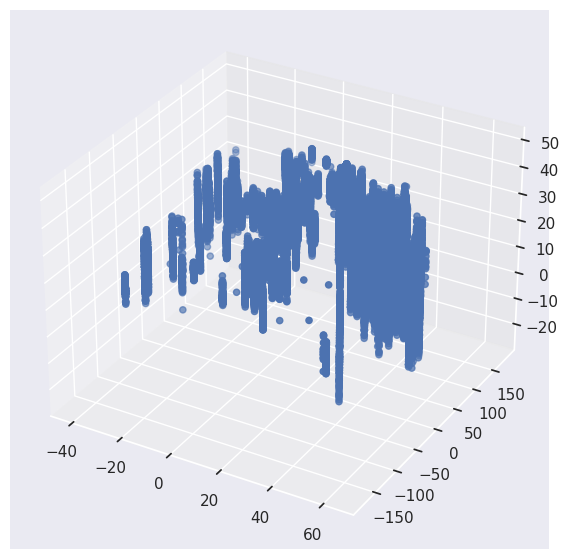

In [10]:
plt.figure(figsize=(7,7))
ax = plt.axes(projection='3d')
ax.scatter3D(weather_data['latitude'], weather_data['longitude'], weather_data['temperature_celsius'])
plt.show()

Let's also look at the histograms of the temperatures for every country.

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 28779 (\N{CJK UNIFIED IDEOGRAPH-706B}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 40481 (\N{CJK UNIFIED IDEOGRAPH-9E21}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


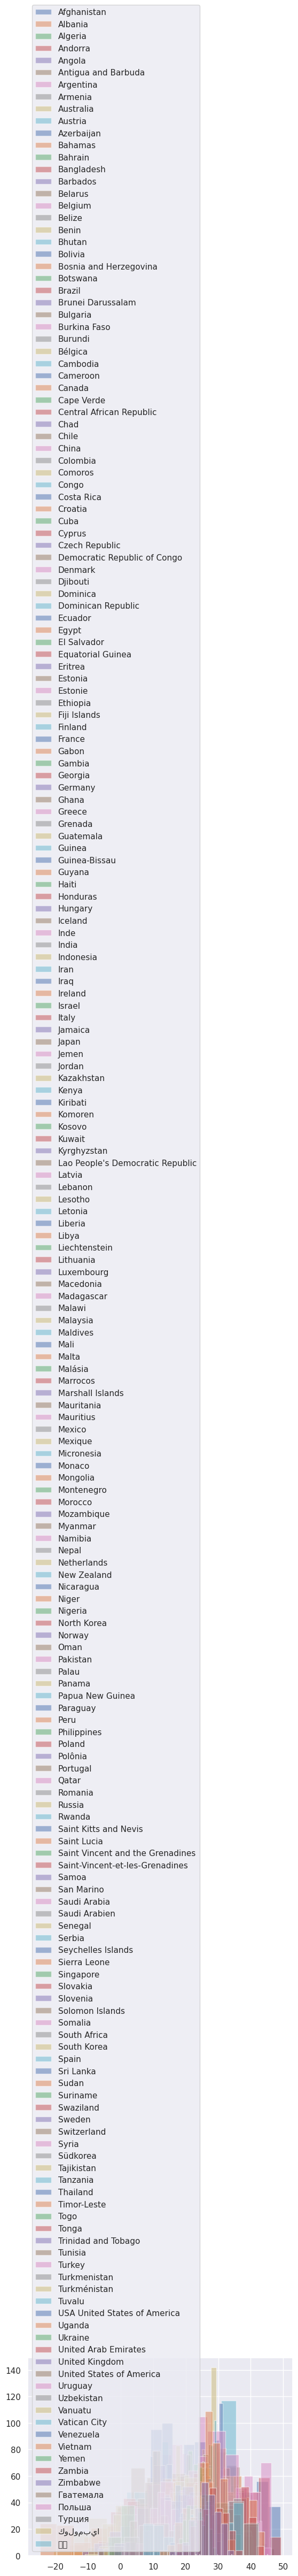

In [11]:
weather_data.groupby('country')['temperature_celsius'].hist(alpha=0.5, legend=True)
plt.show()

Let's pick one place: Afghanistan to analyse how the temperature changes with time

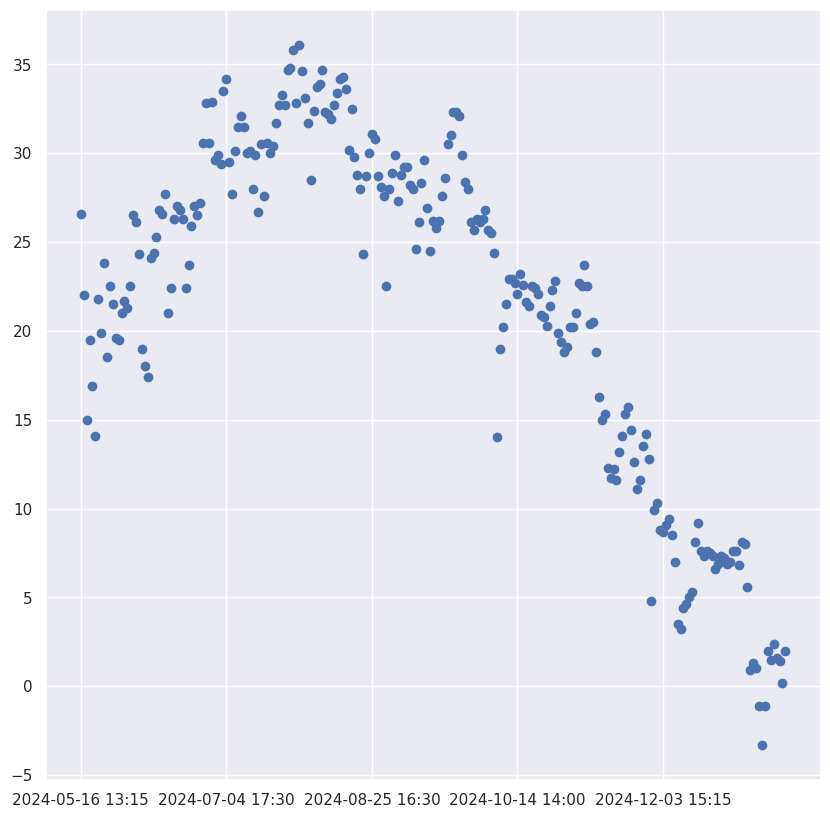

In [12]:
afghanistan = weather_data[weather_data["country"] == "Afghanistan"]
plt.figure(figsize=(10, 10))
plt.scatter(afghanistan["last_updated"], afghanistan["temperature_celsius"])
interval = 50
plt.gca().set_xticks(afghanistan["last_updated"][::interval])
plt.show()

In [13]:
weather_data["last_updated"].min()

'2024-05-16 01:45'

In [14]:
weather_data["last_updated"].max()

'2025-01-15 00:45'

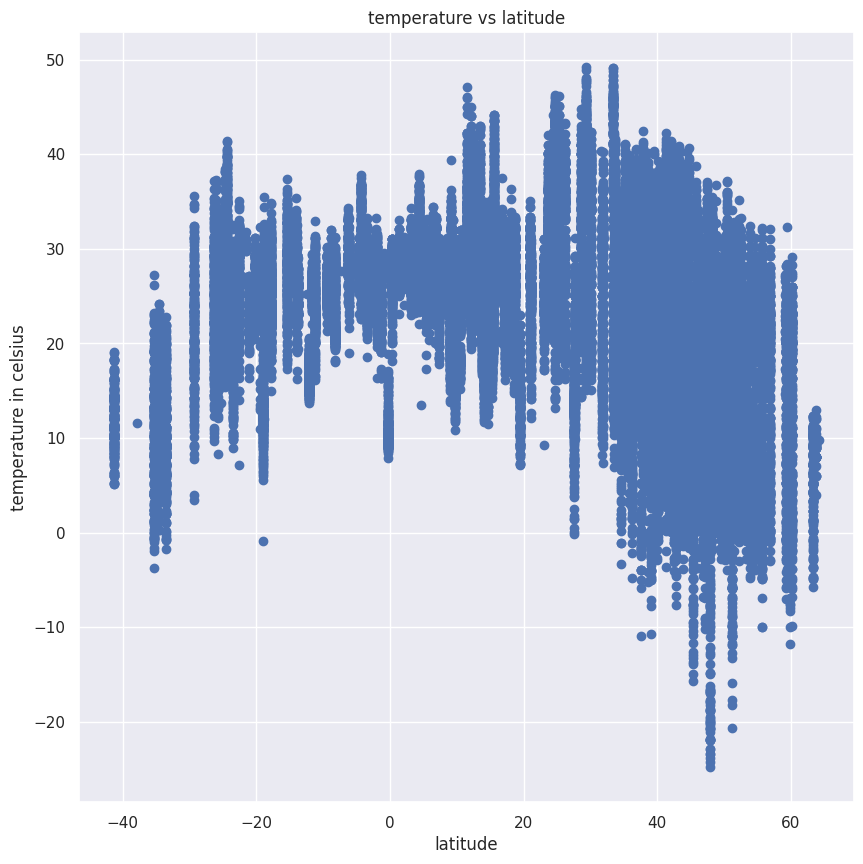

In [15]:
plt.figure(figsize=(10, 10))
plt.scatter(weather_data["latitude"], weather_data["temperature_celsius"])
plt.xlabel("latitude")
plt.ylabel("temperature in celsius")
plt.title("temperature vs latitude")
plt.show()

Looks like the temperature  is related to the negative of the square of the latitude. We can confirm this with the correlation coefficient of the temperature with the latitude combination and the temperature with the negative square of the latitude values. 

In [16]:
correlation_coefficient, p_value = pearsonr(weather_data["latitude"], weather_data["temperature_celsius"])
correlation_coefficient

-0.2584193810501409

In [17]:
p_value

0.0

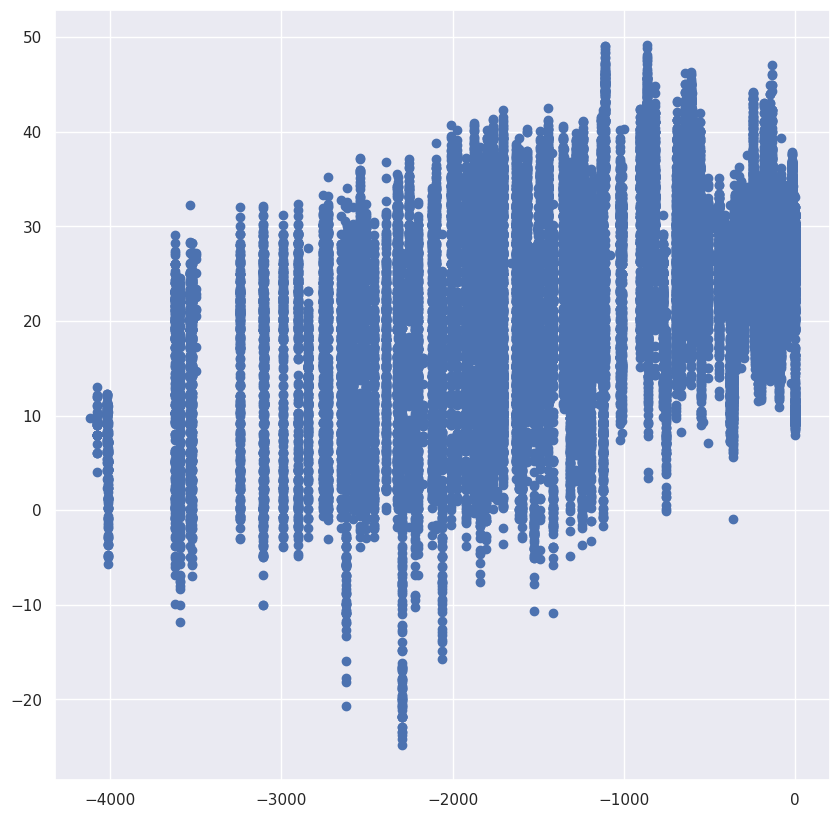

In [18]:
plt.figure(figsize=(10, 10))
plt.scatter(-(weather_data["latitude"]**2), weather_data["temperature_celsius"])
plt.show()

In [19]:
correlation_coefficient, p_value = pearsonr(-(weather_data["latitude"]**2), weather_data["temperature_celsius"])
correlation_coefficient

0.49577819555603564

In [20]:
p_value

0.0

So far we have seen that the temperature is influence by the latitudes. Let's analyze the other features one by one now. 

We will look at the plot of the temperature against the longitude value now. 

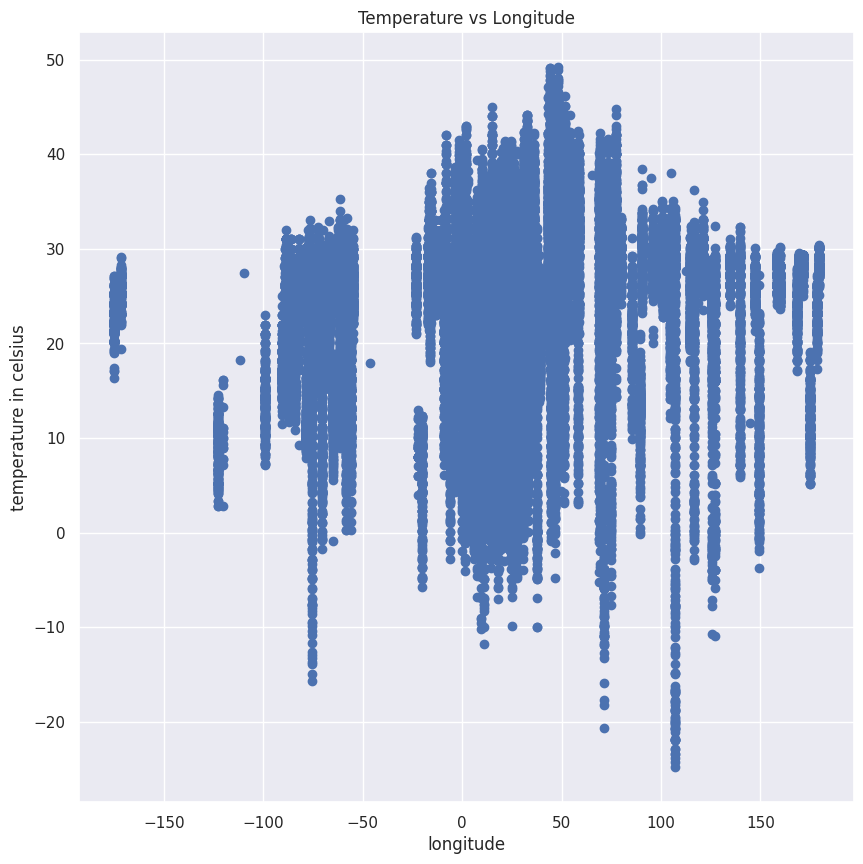

In [21]:
plt.figure(figsize=(10, 10))
plt.scatter(weather_data["longitude"], weather_data["temperature_celsius"])
plt.xlabel('longitude')
plt.ylabel('temperature in celsius')
plt.title('Temperature vs Longitude')
plt.show()

In [22]:
correlation_coefficient, p_value = pearsonr(weather_data["longitude"], weather_data["temperature_celsius"])
correlation_coefficient

0.10477542894287323

In [23]:
p_value

3.17360703798543e-115

There is not much correlation between the temperature and the longitude values. Let's look at the other features.

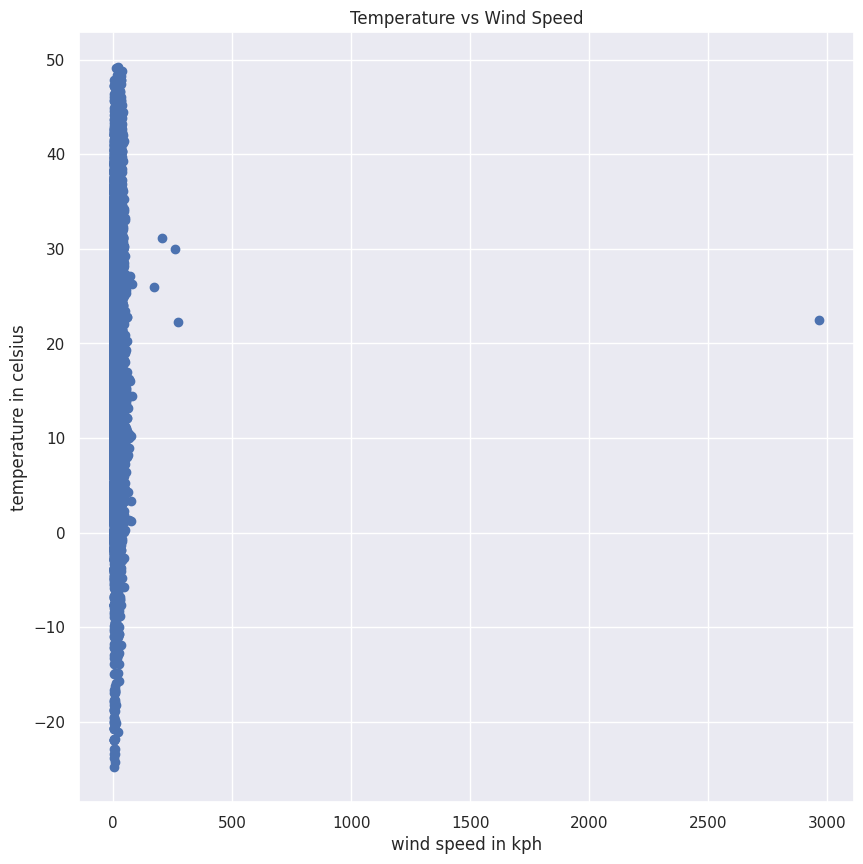

In [24]:
plt.figure(figsize=(10, 10))
plt.scatter(weather_data["wind_kph"], weather_data["temperature_celsius"])
plt.xlabel("wind speed in kph")
plt.ylabel("temperature in celsius")
plt.title("Temperature vs Wind Speed")
plt.show()

Normalize the variable wind speed using the Z-score

In [25]:
mean_wind_speed = weather_data["wind_kph"].mean()
std_wind_speed = weather_data["wind_kph"].std()

In [26]:
weather_data["wind_speed"] = (weather_data["wind_kph"] - mean_wind_speed) / std_wind_speed
no_outlier_data = weather_data[weather_data["wind_speed"] <= 1]

In [27]:
no_outlier_data.shape

(44784, 42)

In [28]:
weather_data.shape

(47162, 42)

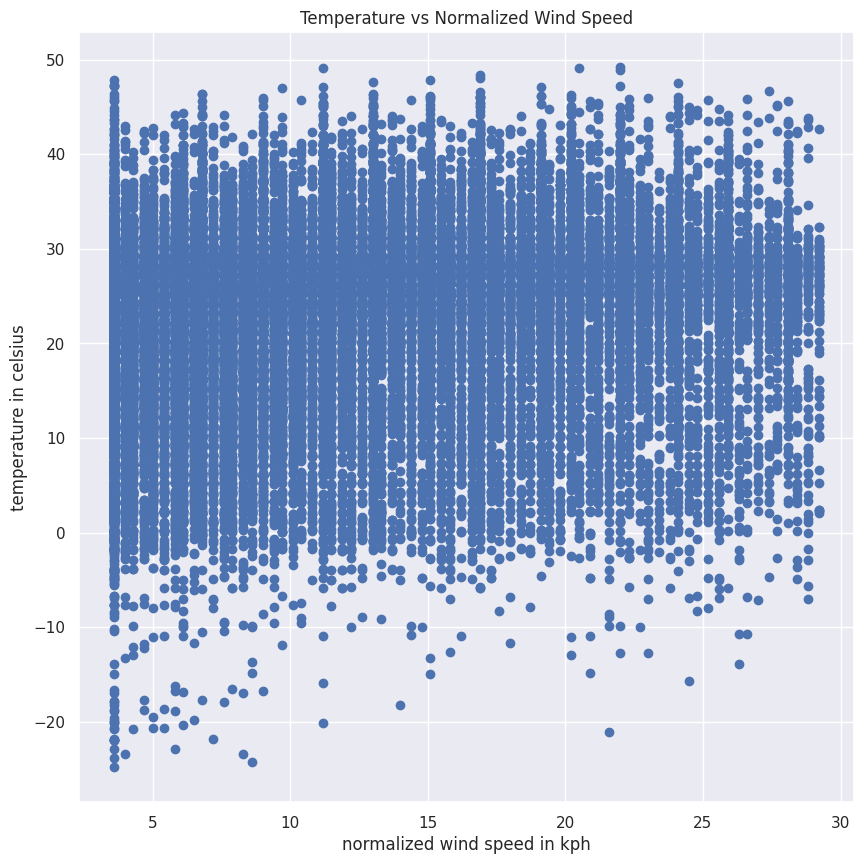

In [29]:
plt.figure(figsize=(10, 10))
plt.scatter(no_outlier_data["wind_kph"], no_outlier_data["temperature_celsius"])
plt.xlabel("normalized wind speed in kph")
plt.ylabel("temperature in celsius")
plt.title("Temperature vs Normalized Wind Speed")
plt.show()

In [30]:
correlation_coefficient, p_value = pearsonr(no_outlier_data["wind_kph"], no_outlier_data["temperature_celsius"])
correlation_coefficient

0.15466297967744452

There isn't much correlation between the wind speed and the temperature. Let's look at the humidity now.

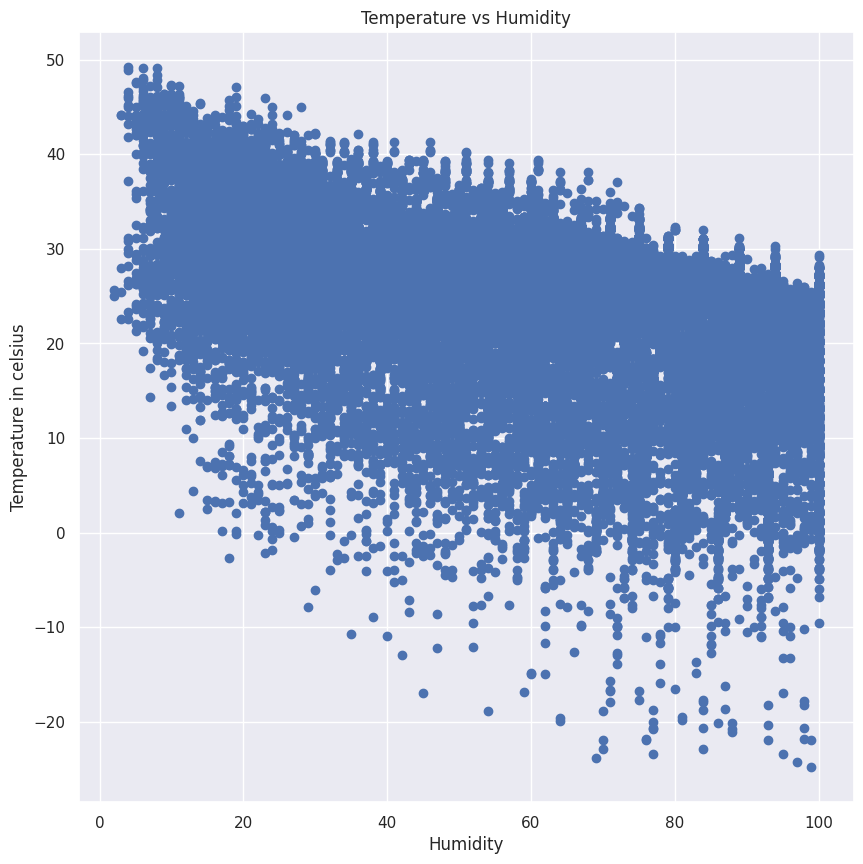

In [31]:
plt.figure(figsize=(10, 10))
plt.scatter(no_outlier_data["humidity"], no_outlier_data["temperature_celsius"])
plt.xlabel("Humidity")
plt.ylabel("Temperature in celsius")
plt.title("Temperature vs Humidity")
plt.show()

In [32]:
correlation_coefficient, p_value = pearsonr(no_outlier_data["humidity"], no_outlier_data["temperature_celsius"])
correlation_coefficient

-0.38174324385246616

In [33]:
p_value

0.0

Looks like the humidity is correlated with the temperature. We will now look at the wind degree.

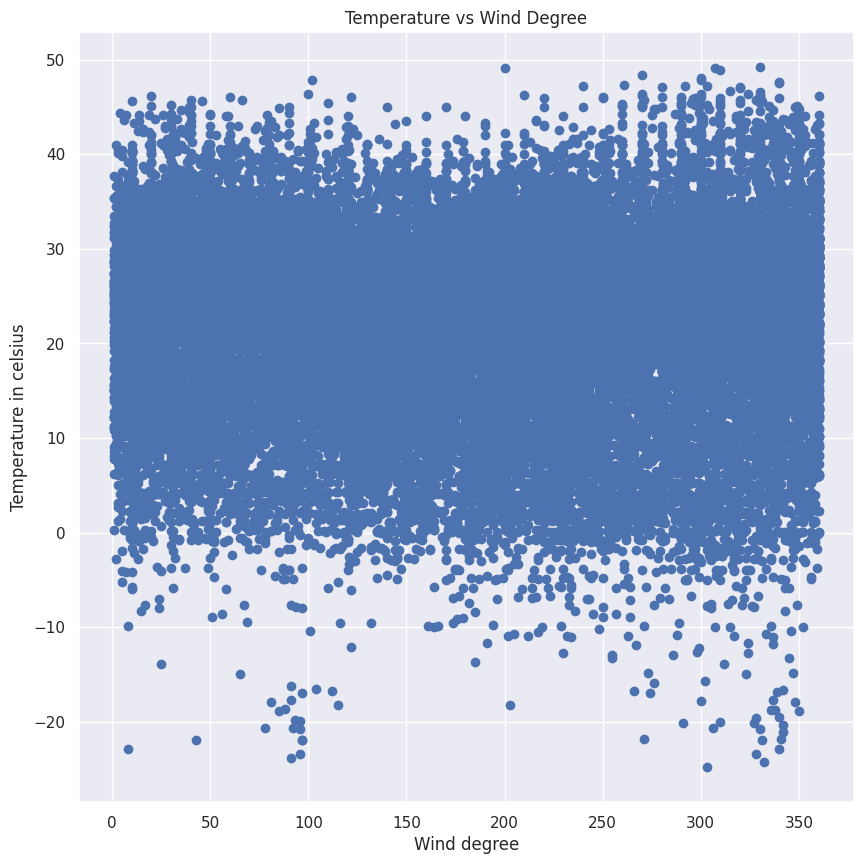

In [34]:
plt.figure(figsize=(10, 10))
plt.scatter(no_outlier_data["wind_degree"], no_outlier_data["temperature_celsius"])
plt.xlabel("Wind degree")
plt.ylabel("Temperature in celsius")
plt.title("Temperature vs Wind Degree")
plt.show()

In [35]:
correlation_coefficient, p_value = pearsonr(no_outlier_data["wind_degree"], no_outlier_data["temperature_celsius"])
correlation_coefficient

-0.03740054373986158

In [36]:
p_value

2.4264910018726098e-15

There does not seem to be any correlation between the wind degree and the temperature. Let's look at the pressure now.

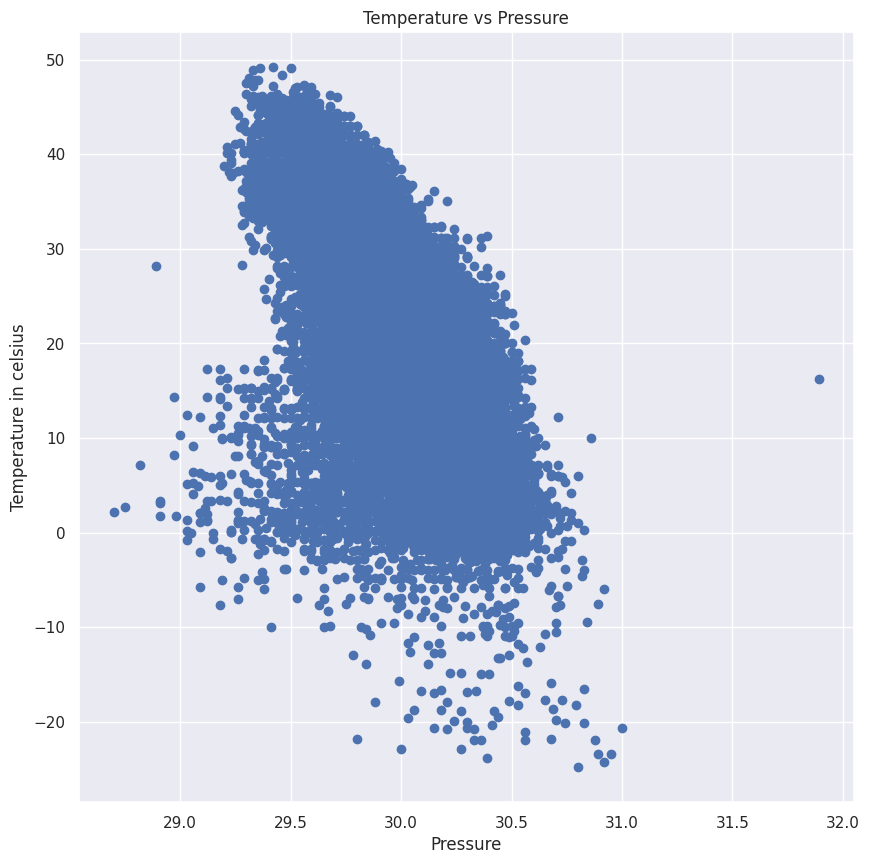

In [37]:
plt.figure(figsize=(10, 10))
plt.scatter(no_outlier_data["pressure_in"], no_outlier_data["temperature_celsius"])
plt.xlabel("Pressure")
plt.ylabel("Temperature in celsius")
plt.title("Temperature vs Pressure")
plt.show()

We need to remove the outliers using the z-score normalization of the pressure.

In [38]:
mean_pressure = no_outlier_data["pressure_in"].mean()
std_pressure = no_outlier_data["pressure_in"].std()

<ipython-input-39-3ea104aea380>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  no_outlier_data["pressure"] = (no_outlier_data["pressure_in"] - mean_pressure) / std_pressure


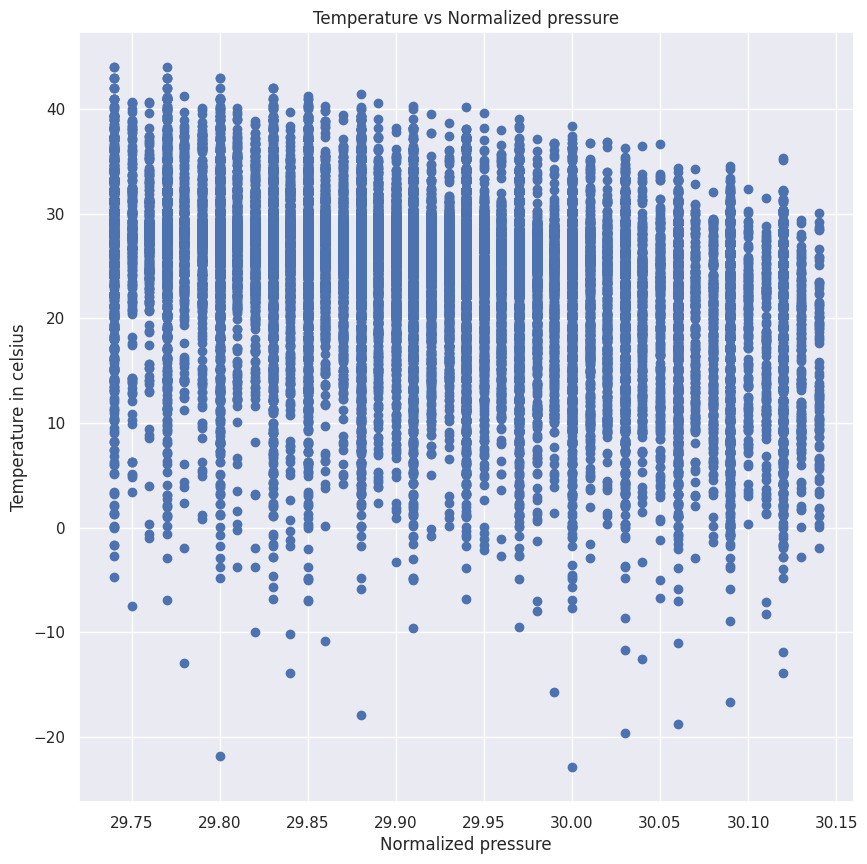

In [39]:
no_outlier_data["pressure"] = (no_outlier_data["pressure_in"] - mean_pressure) / std_pressure
no_outlier_data = no_outlier_data[(no_outlier_data["pressure"] <= 1) & (no_outlier_data["pressure"] >= -1)]

plt.figure(figsize=(10, 10))
plt.scatter(no_outlier_data["pressure_in"], no_outlier_data["temperature_celsius"])
plt.xlabel("Normalized pressure")
plt.ylabel("Temperature in celsius")
plt.title("Temperature vs Normalized pressure")
plt.show()

In [40]:
correlation_coefficient, p_value = pearsonr(no_outlier_data["pressure_in"], no_outlier_data["temperature_celsius"])
correlation_coefficient

-0.35043162774193026

In [41]:
p_value

0.0

The temperature is slightly correlated to the pressure. Now lets look at the gust in kph.

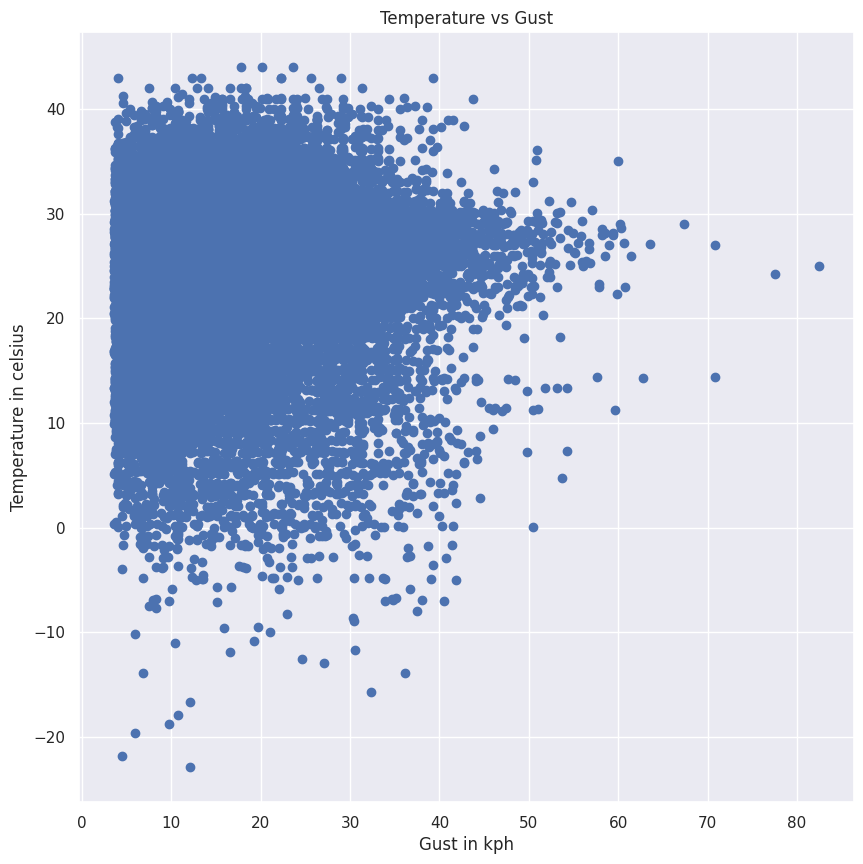

In [42]:
plt.figure(figsize=(10, 10))
plt.scatter(no_outlier_data["gust_kph"], no_outlier_data["temperature_celsius"])
plt.xlabel("Gust in kph")
plt.ylabel("Temperature in celsius")
plt.title("Temperature vs Gust")
plt.show()

In [43]:
correlation_coefficient, p_value = pearsonr(no_outlier_data["gust_kph"], no_outlier_data["temperature_celsius"])
correlation_coefficient

0.10542983202421431

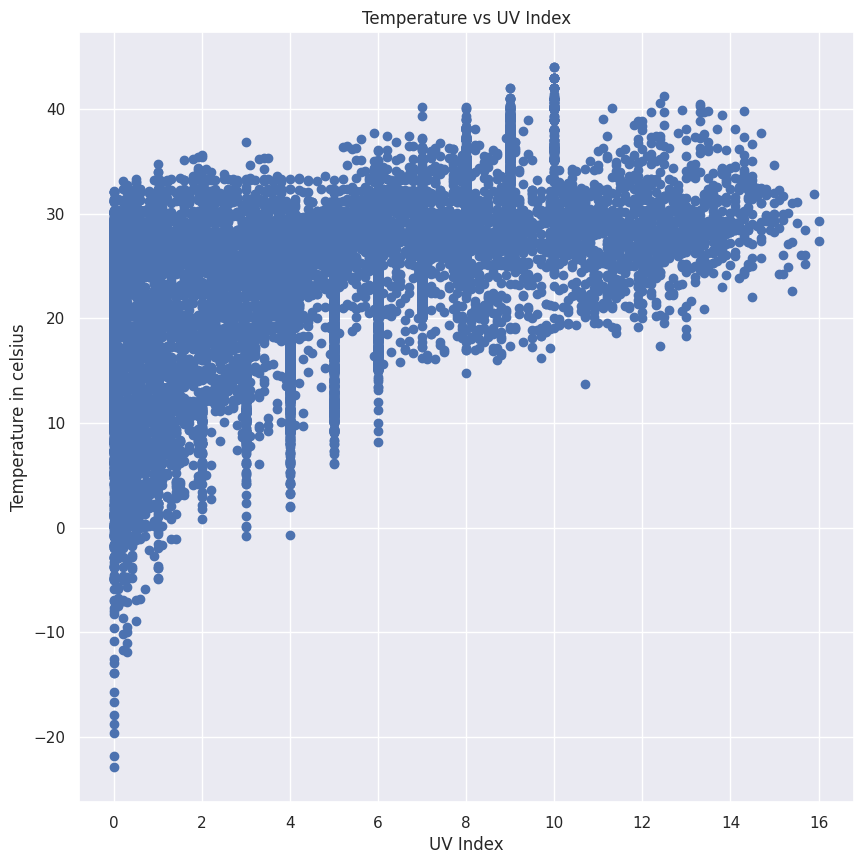

In [44]:
plt.figure(figsize=(10, 10))
plt.scatter(no_outlier_data["uv_index"], no_outlier_data["temperature_celsius"])
plt.xlabel("UV Index")
plt.ylabel("Temperature in celsius")
plt.title("Temperature vs UV Index")
plt.show()

In [45]:
correlation_coefficient, p_value = pearsonr(no_outlier_data["uv_index"], no_outlier_data["temperature_celsius"])
correlation_coefficient

0.49247057709703024

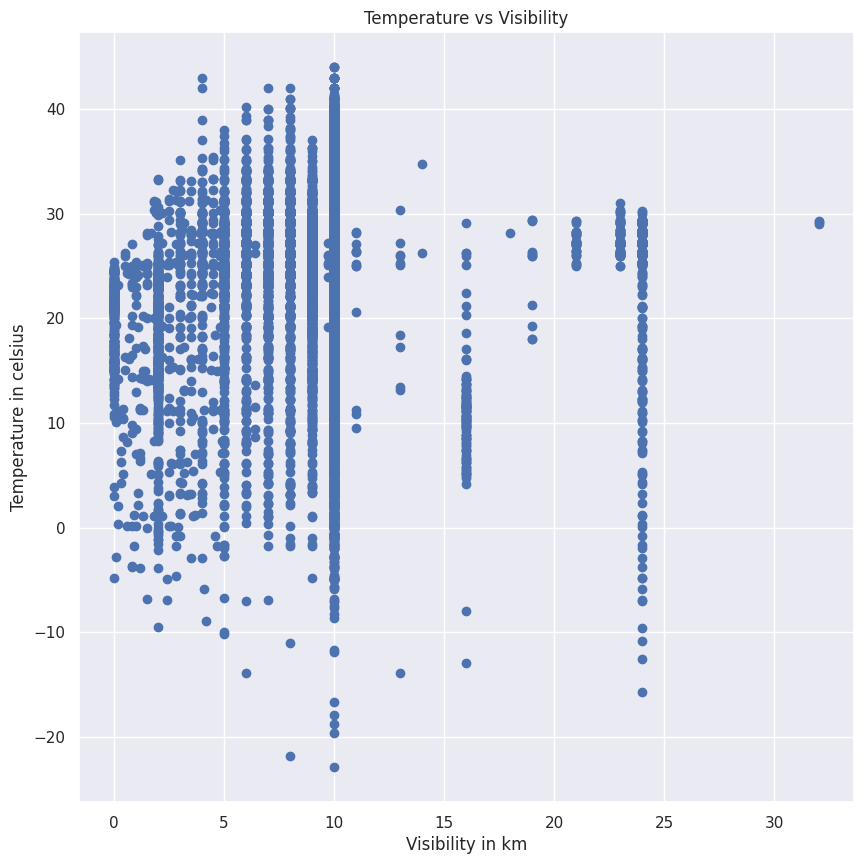

In [46]:
plt.figure(figsize=(10, 10))
plt.scatter(no_outlier_data["visibility_km"], no_outlier_data["temperature_celsius"])
plt.xlabel("Visibility in km")
plt.ylabel("Temperature in celsius")
plt.title("Temperature vs Visibility")
plt.show()

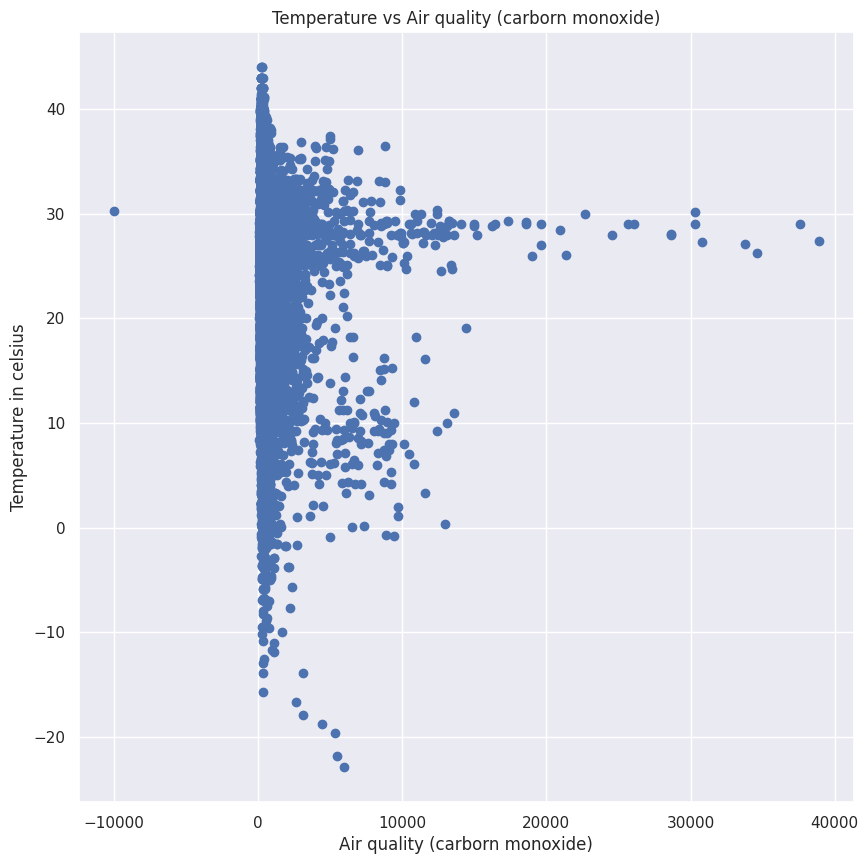

In [47]:
plt.figure(figsize=(10, 10))
plt.scatter(no_outlier_data["air_quality_Carbon_Monoxide"], no_outlier_data["temperature_celsius"])
plt.xlabel("Air quality (carborn monoxide)")
plt.ylabel("Temperature in celsius")
plt.title("Temperature vs Air quality (carborn monoxide)")
plt.show()

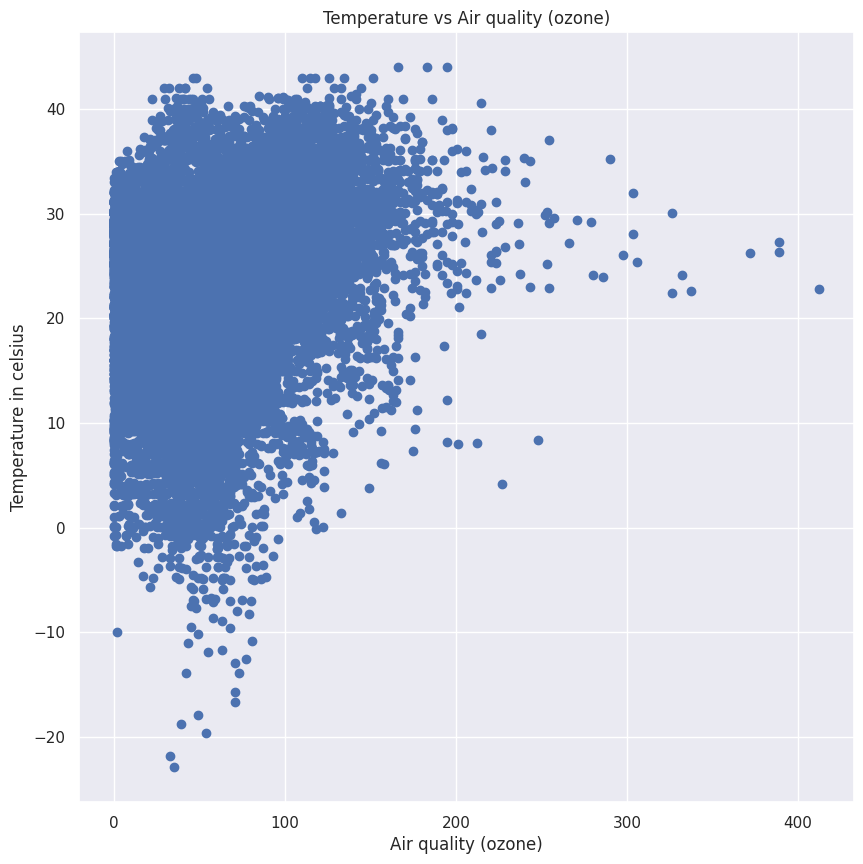

In [48]:
plt.figure(figsize=(10, 10))
plt.scatter(no_outlier_data["air_quality_Ozone"], no_outlier_data["temperature_celsius"])
plt.xlabel("Air quality (ozone)")
plt.ylabel("Temperature in celsius")
plt.title("Temperature vs Air quality (ozone)")
plt.show()

In [49]:
correlation_coefficient, p_value = pearsonr(no_outlier_data["air_quality_Ozone"], no_outlier_data["temperature_celsius"])
correlation_coefficient

0.18632270071373233

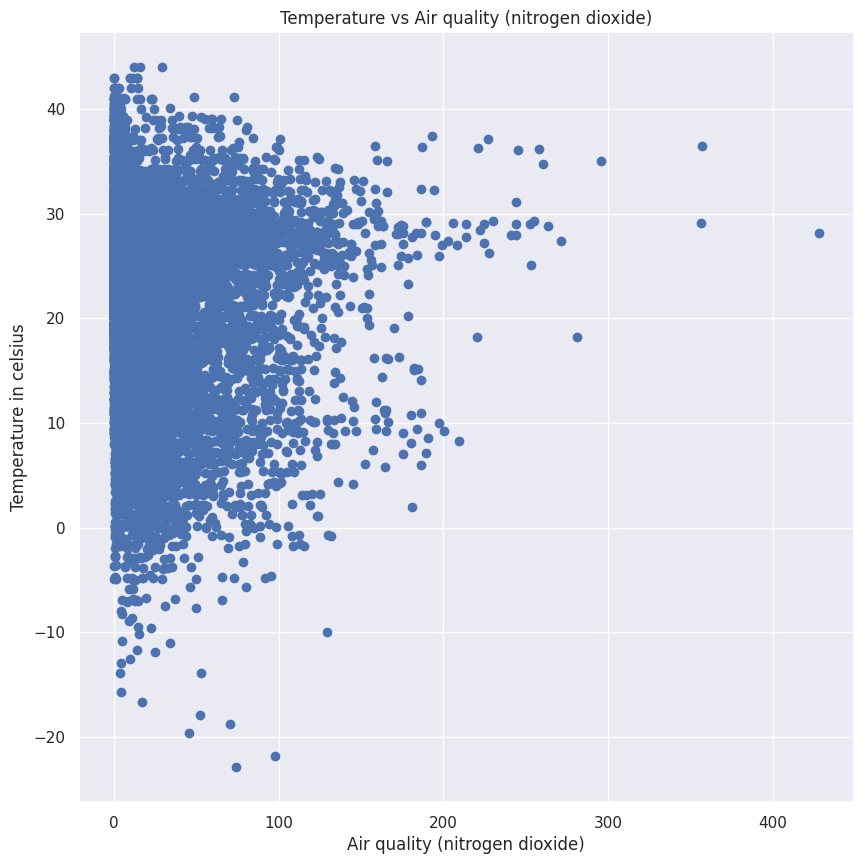

In [50]:
plt.figure(figsize=(10, 10))
plt.scatter(no_outlier_data["air_quality_Nitrogen_dioxide"], no_outlier_data["temperature_celsius"])
plt.xlabel("Air quality (nitrogen dioxide)")
plt.ylabel("Temperature in celsius")
plt.title("Temperature vs Air quality (nitrogen dioxide)")
plt.show()

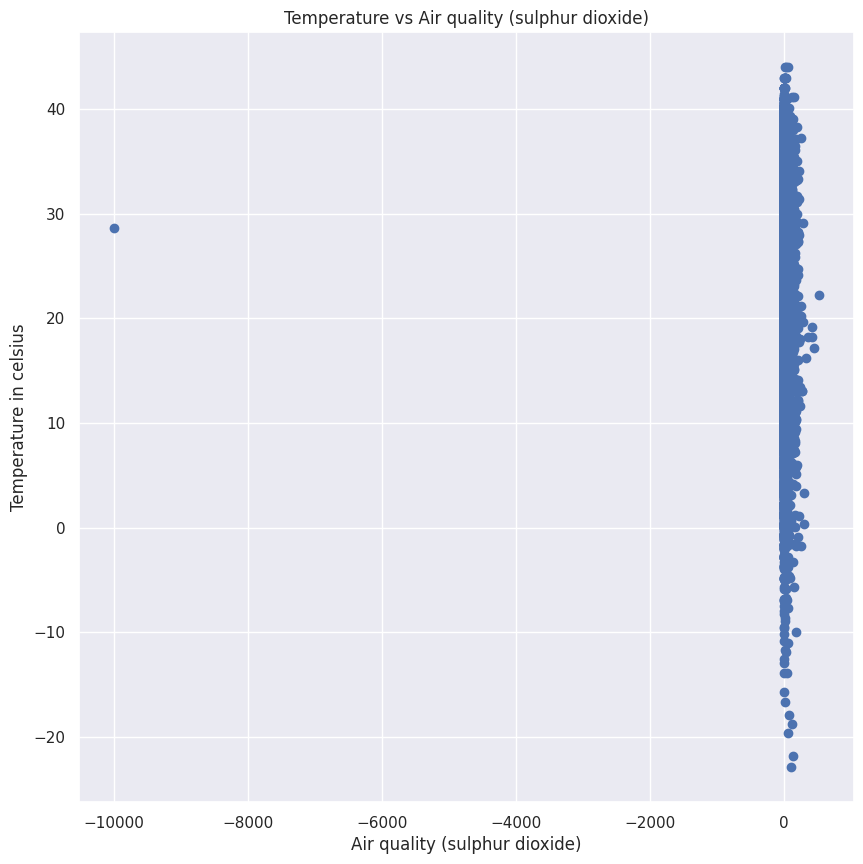

In [51]:
plt.figure(figsize=(10, 10))
plt.scatter(no_outlier_data["air_quality_Sulphur_dioxide"], no_outlier_data["temperature_celsius"])
plt.xlabel("Air quality (sulphur dioxide)")
plt.ylabel("Temperature in celsius")
plt.title("Temperature vs Air quality (sulphur dioxide)")
plt.show()

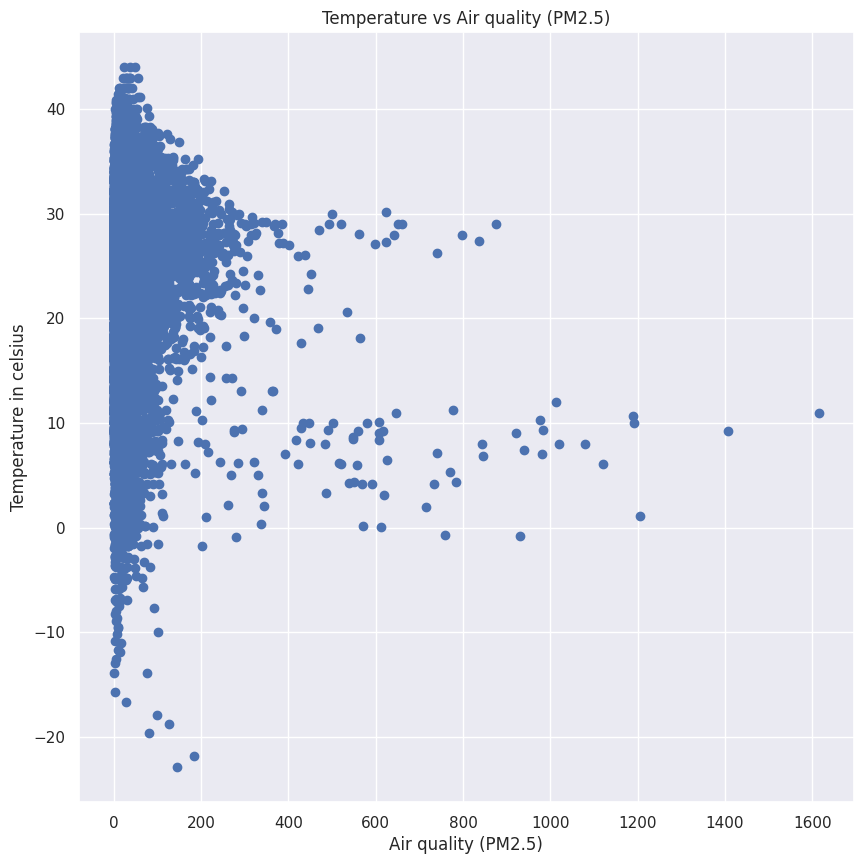

In [52]:
plt.figure(figsize=(10, 10))
plt.scatter(no_outlier_data["air_quality_PM2.5"], no_outlier_data["temperature_celsius"])
plt.xlabel("Air quality (PM2.5)")
plt.ylabel("Temperature in celsius")
plt.title("Temperature vs Air quality (PM2.5)")
plt.show()

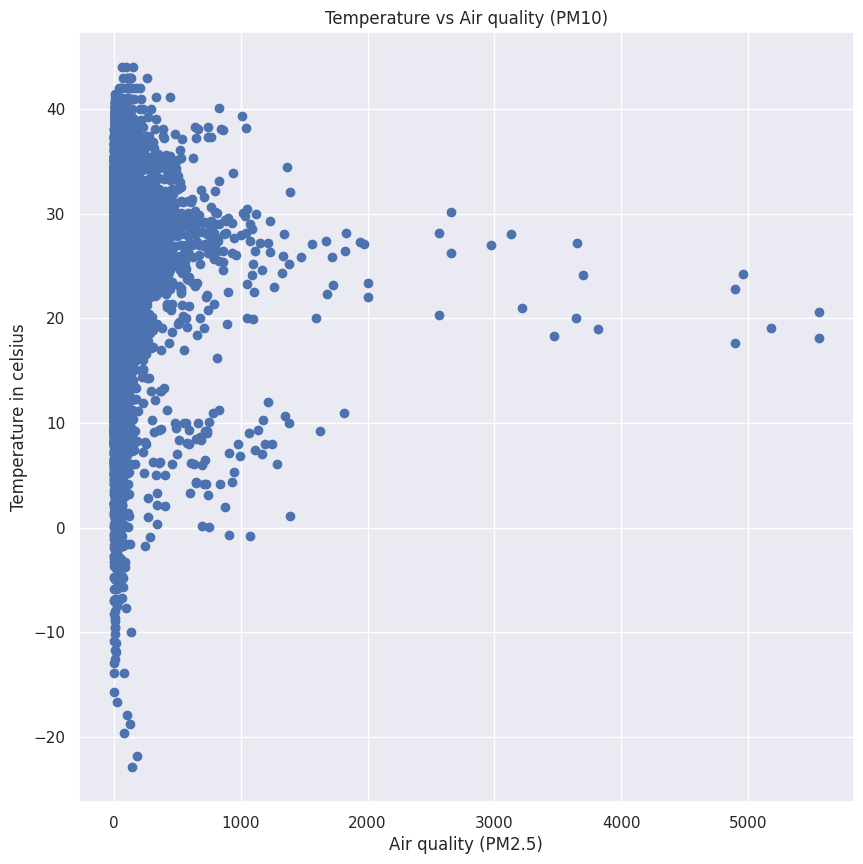

In [53]:
plt.figure(figsize=(10, 10))
plt.scatter(no_outlier_data["air_quality_PM10"], no_outlier_data["temperature_celsius"])
plt.xlabel("Air quality (PM2.5)")
plt.ylabel("Temperature in celsius")
plt.title("Temperature vs Air quality (PM10)")
plt.show()

The only features that correlate with the temperature are latitude, pressure, humidity, and uv index. We have seen that there is a trend in the temperature depending on the time. Let's explore that further.

In [54]:
afghanistan.sort_values(by=['last_updated'], ascending=True, inplace=True)
afghanistan

<ipython-input-54-f5e1dc94f9f3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  afghanistan.sort_values(by=['last_updated'], ascending=True, inplace=True)


,country,location_name,latitude,longitude,timezone,last_updated_epoch,last_updated,temperature_celsius,temperature_fahrenheit,condition_text,wind_mph,wind_kph,wind_degree,wind_direction,pressure_mb,pressure_in,precip_mm,precip_in,humidity,cloud,feels_like_celsius,feels_like_fahrenheit,visibility_km,visibility_miles,uv_index,gust_mph,gust_kph,air_quality_Carbon_Monoxide,air_quality_Ozone,air_quality_Nitrogen_dioxide,air_quality_Sulphur_dioxide,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,sunrise,sunset,moonrise,moonset,moon_phase,moon_illumination
0,Afghanistan,Kabul,34.5200,69.1800,Asia/Kabul,1715849100,2024-05-16 13:15,26.6,79.8,Partly Cloudy,8.3,13.3,338,NNW,1012.0,29.89,0.00,0.00,24,30,25.3,77.5,10.0,6.0,7.0,9.5,15.3,277.00,103.0,1.100,0.200,8.400,26.600,1,1,04:50 AM,06:50 PM,12:12 PM,01:11 AM,Waxing Gibbous,55
195,Afghanistan,Kabul,34.5200,69.1800,Asia/Kabul,1715868000,2024-05-16 18:30,22.0,71.6,Patchy rain nearby,4.5,7.2,318,NW,1014.0,29.93,0.03,0.00,41,89,22.0,71.5,10.0,6.0,5.0,5.3,8.5,1495.40,60.1,19.400,0.600,9.400,18.900,1,1,04:50 AM,06:50 PM,12:12 PM,01:11 AM,Waxing Gibbous,55
390,Afghanistan,Kabul,34.5200,69.1800,Asia/Kabul,1715961600,2024-05-17 20:30,15.0,58.9,Patchy rain nearby,3.4,5.4,17,NNE,1017.0,30.02,0.69,0.03,75,77,15.3,59.6,9.0,5.0,1.0,4.7,7.6,854.50,70.8,9.400,0.600,8.300,18.100,1,1,04:49 AM,06:51 PM,01:09 PM,01:37 AM,Waxing Gibbous,64
583,Afghanistan,Kabul,34.5200,69.1800,Asia/Kabul,1716042600,2024-05-18 19:00,19.5,67.1,Clear,2.2,3.6,129,SE,1010.0,29.82,0.00,0.00,46,15,19.5,67.1,10.0,6.0,1.0,6.7,10.8,794.40,76.5,6.200,0.500,7.500,15.300,1,1,04:48 AM,06:51 PM,02:04 PM,02:00 AM,Waxing Gibbous,73
776,Afghanistan,Kabul,34.5200,69.1800,Asia/Kabul,1716127200,2024-05-19 18:30,16.9,62.4,Patchy rain nearby,4.0,6.5,139,SE,1010.0,29.82,0.17,0.01,52,75,16.9,62.5,9.0,5.0,4.0,5.3,8.6,1174.90,87.3,14.900,0.600,4.800,10.100,1,1,04:48 AM,06:52 PM,03:00 PM,02:22 AM,Waxing Gibbous,81
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46187,Afghanistan,Kabul,34.5167,69.1833,Asia/Kabul,1736505900,2025-01-10 15:15,2.4,36.4,Sunny,3.6,5.8,198,SSW,1025.0,30.26,0.00,0.00,49,0,0.9,33.6,10.0,6.0,0.5,5.0,8.0,1111.85,163.0,14.985,5.735,40.330,41.255,2,4,07:01 AM,05:01 PM,01:24 PM,03:27 AM,Waxing Gibbous,80
46382,Afghanistan,Kabul,34.5167,69.1833,Asia/Kabul,1736591400,2025-01-11 15:00,1.6,34.9,Sunny,3.6,5.8,193,SSW,1023.0,30.22,0.00,0.00,62,5,-0.1,31.9,10.0,6.0,0.5,5.5,8.9,904.65,153.0,12.395,6.845,35.520,37.555,2,3,07:00 AM,05:02 PM,02:15 PM,04:38 AM,Waxing Gibbous,88
46577,Afghanistan,Kabul,34.5167,69.1833,Asia/Kabul,1736677800,2025-01-12 15:00,1.4,34.5,Sunny,3.1,5.0,194,SSW,1026.0,30.29,0.00,0.00,52,0,-0.0,32.0,10.0,6.0,0.5,4.1,6.7,693.75,148.0,7.585,8.510,26.085,28.305,2,3,07:00 AM,05:03 PM,03:15 PM,05:45 AM,Waxing Gibbous,94
46772,Afghanistan,Kabul,34.5167,69.1833,Asia/Kabul,1736765100,2025-01-13 15:15,0.2,32.3,Sunny,2.7,4.3,185,S,1026.0,30.29,0.00,0.00,57,4,-1.1,30.1,10.0,6.0,0.5,3.6,5.8,865.80,153.0,8.510,5.920,30.710,34.410,2,3,07:00 AM,05:04 PM,04:20 PM,06:42 AM,Full Moon,98


In [55]:
afghanistan.iloc[0]['last_updated']

'2024-05-16 13:15'

In [56]:
datetime.datetime.strptime(afghanistan.iloc[0]['last_updated'], "%Y-%m-%d %H:%M")

datetime.datetime(2024, 5, 16, 13, 15)

In [57]:
date = datetime.datetime.strptime(afghanistan.iloc[0]['last_updated'], "%Y-%m-%d %H:%M")

In [58]:
target_date = datetime.datetime.fromtimestamp(0)

In [59]:
time_diff = date - target_date
total_minutes = time_diff.total_seconds() // 60
total_minutes

28597755.0

In [60]:
def get_minutes(x):
    date_obj = datetime.datetime.strptime(x, "%Y-%m-%d %H:%M")
    target_date = datetime.datetime.fromtimestamp(0)
    time_diff = date_obj - target_date
    total_minutes = time_diff.total_seconds() // 60
    return total_minutes

In [61]:
afghanistan['minutes'] = afghanistan['last_updated'].apply(get_minutes)
afghanistan

<ipython-input-61-92407f9823b1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  afghanistan['minutes'] = afghanistan['last_updated'].apply(get_minutes)


,country,location_name,latitude,longitude,timezone,last_updated_epoch,last_updated,temperature_celsius,temperature_fahrenheit,condition_text,wind_mph,wind_kph,wind_degree,wind_direction,pressure_mb,pressure_in,precip_mm,precip_in,humidity,cloud,feels_like_celsius,feels_like_fahrenheit,visibility_km,visibility_miles,uv_index,gust_mph,gust_kph,air_quality_Carbon_Monoxide,air_quality_Ozone,air_quality_Nitrogen_dioxide,air_quality_Sulphur_dioxide,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,sunrise,sunset,moonrise,moonset,moon_phase,moon_illumination,minutes
0,Afghanistan,Kabul,34.5200,69.1800,Asia/Kabul,1715849100,2024-05-16 13:15,26.6,79.8,Partly Cloudy,8.3,13.3,338,NNW,1012.0,29.89,0.00,0.00,24,30,25.3,77.5,10.0,6.0,7.0,9.5,15.3,277.00,103.0,1.100,0.200,8.400,26.600,1,1,04:50 AM,06:50 PM,12:12 PM,01:11 AM,Waxing Gibbous,55,28597755.0
195,Afghanistan,Kabul,34.5200,69.1800,Asia/Kabul,1715868000,2024-05-16 18:30,22.0,71.6,Patchy rain nearby,4.5,7.2,318,NW,1014.0,29.93,0.03,0.00,41,89,22.0,71.5,10.0,6.0,5.0,5.3,8.5,1495.40,60.1,19.400,0.600,9.400,18.900,1,1,04:50 AM,06:50 PM,12:12 PM,01:11 AM,Waxing Gibbous,55,28598070.0
390,Afghanistan,Kabul,34.5200,69.1800,Asia/Kabul,1715961600,2024-05-17 20:30,15.0,58.9,Patchy rain nearby,3.4,5.4,17,NNE,1017.0,30.02,0.69,0.03,75,77,15.3,59.6,9.0,5.0,1.0,4.7,7.6,854.50,70.8,9.400,0.600,8.300,18.100,1,1,04:49 AM,06:51 PM,01:09 PM,01:37 AM,Waxing Gibbous,64,28599630.0
583,Afghanistan,Kabul,34.5200,69.1800,Asia/Kabul,1716042600,2024-05-18 19:00,19.5,67.1,Clear,2.2,3.6,129,SE,1010.0,29.82,0.00,0.00,46,15,19.5,67.1,10.0,6.0,1.0,6.7,10.8,794.40,76.5,6.200,0.500,7.500,15.300,1,1,04:48 AM,06:51 PM,02:04 PM,02:00 AM,Waxing Gibbous,73,28600980.0
776,Afghanistan,Kabul,34.5200,69.1800,Asia/Kabul,1716127200,2024-05-19 18:30,16.9,62.4,Patchy rain nearby,4.0,6.5,139,SE,1010.0,29.82,0.17,0.01,52,75,16.9,62.5,9.0,5.0,4.0,5.3,8.6,1174.90,87.3,14.900,0.600,4.800,10.100,1,1,04:48 AM,06:52 PM,03:00 PM,02:22 AM,Waxing Gibbous,81,28602390.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46187,Afghanistan,Kabul,34.5167,69.1833,Asia/Kabul,1736505900,2025-01-10 15:15,2.4,36.4,Sunny,3.6,5.8,198,SSW,1025.0,30.26,0.00,0.00,49,0,0.9,33.6,10.0,6.0,0.5,5.0,8.0,1111.85,163.0,14.985,5.735,40.330,41.255,2,4,07:01 AM,05:01 PM,01:24 PM,03:27 AM,Waxing Gibbous,80,28942035.0
46382,Afghanistan,Kabul,34.5167,69.1833,Asia/Kabul,1736591400,2025-01-11 15:00,1.6,34.9,Sunny,3.6,5.8,193,SSW,1023.0,30.22,0.00,0.00,62,5,-0.1,31.9,10.0,6.0,0.5,5.5,8.9,904.65,153.0,12.395,6.845,35.520,37.555,2,3,07:00 AM,05:02 PM,02:15 PM,04:38 AM,Waxing Gibbous,88,28943460.0
46577,Afghanistan,Kabul,34.5167,69.1833,Asia/Kabul,1736677800,2025-01-12 15:00,1.4,34.5,Sunny,3.1,5.0,194,SSW,1026.0,30.29,0.00,0.00,52,0,-0.0,32.0,10.0,6.0,0.5,4.1,6.7,693.75,148.0,7.585,8.510,26.085,28.305,2,3,07:00 AM,05:03 PM,03:15 PM,05:45 AM,Waxing Gibbous,94,28944900.0
46772,Afghanistan,Kabul,34.5167,69.1833,Asia/Kabul,1736765100,2025-01-13 15:15,0.2,32.3,Sunny,2.7,4.3,185,S,1026.0,30.29,0.00,0.00,57,4,-1.1,30.1,10.0,6.0,0.5,3.6,5.8,865.80,153.0,8.510,5.920,30.710,34.410,2,3,07:00 AM,05:04 PM,04:20 PM,06:42 AM,Full Moon,98,28946355.0


In [62]:
least_minutes = afghanistan["minutes"].min()
afghanistan["minutes"] = afghanistan["minutes"] - least_minutes

<ipython-input-62-d3c9c94394ee>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  afghanistan["minutes"] = afghanistan["minutes"] - least_minutes


In [63]:
afghanistan

,country,location_name,latitude,longitude,timezone,last_updated_epoch,last_updated,temperature_celsius,temperature_fahrenheit,condition_text,wind_mph,wind_kph,wind_degree,wind_direction,pressure_mb,pressure_in,precip_mm,precip_in,humidity,cloud,feels_like_celsius,feels_like_fahrenheit,visibility_km,visibility_miles,uv_index,gust_mph,gust_kph,air_quality_Carbon_Monoxide,air_quality_Ozone,air_quality_Nitrogen_dioxide,air_quality_Sulphur_dioxide,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,sunrise,sunset,moonrise,moonset,moon_phase,moon_illumination,minutes
0,Afghanistan,Kabul,34.5200,69.1800,Asia/Kabul,1715849100,2024-05-16 13:15,26.6,79.8,Partly Cloudy,8.3,13.3,338,NNW,1012.0,29.89,0.00,0.00,24,30,25.3,77.5,10.0,6.0,7.0,9.5,15.3,277.00,103.0,1.100,0.200,8.400,26.600,1,1,04:50 AM,06:50 PM,12:12 PM,01:11 AM,Waxing Gibbous,55,0.0
195,Afghanistan,Kabul,34.5200,69.1800,Asia/Kabul,1715868000,2024-05-16 18:30,22.0,71.6,Patchy rain nearby,4.5,7.2,318,NW,1014.0,29.93,0.03,0.00,41,89,22.0,71.5,10.0,6.0,5.0,5.3,8.5,1495.40,60.1,19.400,0.600,9.400,18.900,1,1,04:50 AM,06:50 PM,12:12 PM,01:11 AM,Waxing Gibbous,55,315.0
390,Afghanistan,Kabul,34.5200,69.1800,Asia/Kabul,1715961600,2024-05-17 20:30,15.0,58.9,Patchy rain nearby,3.4,5.4,17,NNE,1017.0,30.02,0.69,0.03,75,77,15.3,59.6,9.0,5.0,1.0,4.7,7.6,854.50,70.8,9.400,0.600,8.300,18.100,1,1,04:49 AM,06:51 PM,01:09 PM,01:37 AM,Waxing Gibbous,64,1875.0
583,Afghanistan,Kabul,34.5200,69.1800,Asia/Kabul,1716042600,2024-05-18 19:00,19.5,67.1,Clear,2.2,3.6,129,SE,1010.0,29.82,0.00,0.00,46,15,19.5,67.1,10.0,6.0,1.0,6.7,10.8,794.40,76.5,6.200,0.500,7.500,15.300,1,1,04:48 AM,06:51 PM,02:04 PM,02:00 AM,Waxing Gibbous,73,3225.0
776,Afghanistan,Kabul,34.5200,69.1800,Asia/Kabul,1716127200,2024-05-19 18:30,16.9,62.4,Patchy rain nearby,4.0,6.5,139,SE,1010.0,29.82,0.17,0.01,52,75,16.9,62.5,9.0,5.0,4.0,5.3,8.6,1174.90,87.3,14.900,0.600,4.800,10.100,1,1,04:48 AM,06:52 PM,03:00 PM,02:22 AM,Waxing Gibbous,81,4635.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46187,Afghanistan,Kabul,34.5167,69.1833,Asia/Kabul,1736505900,2025-01-10 15:15,2.4,36.4,Sunny,3.6,5.8,198,SSW,1025.0,30.26,0.00,0.00,49,0,0.9,33.6,10.0,6.0,0.5,5.0,8.0,1111.85,163.0,14.985,5.735,40.330,41.255,2,4,07:01 AM,05:01 PM,01:24 PM,03:27 AM,Waxing Gibbous,80,344280.0
46382,Afghanistan,Kabul,34.5167,69.1833,Asia/Kabul,1736591400,2025-01-11 15:00,1.6,34.9,Sunny,3.6,5.8,193,SSW,1023.0,30.22,0.00,0.00,62,5,-0.1,31.9,10.0,6.0,0.5,5.5,8.9,904.65,153.0,12.395,6.845,35.520,37.555,2,3,07:00 AM,05:02 PM,02:15 PM,04:38 AM,Waxing Gibbous,88,345705.0
46577,Afghanistan,Kabul,34.5167,69.1833,Asia/Kabul,1736677800,2025-01-12 15:00,1.4,34.5,Sunny,3.1,5.0,194,SSW,1026.0,30.29,0.00,0.00,52,0,-0.0,32.0,10.0,6.0,0.5,4.1,6.7,693.75,148.0,7.585,8.510,26.085,28.305,2,3,07:00 AM,05:03 PM,03:15 PM,05:45 AM,Waxing Gibbous,94,347145.0
46772,Afghanistan,Kabul,34.5167,69.1833,Asia/Kabul,1736765100,2025-01-13 15:15,0.2,32.3,Sunny,2.7,4.3,185,S,1026.0,30.29,0.00,0.00,57,4,-1.1,30.1,10.0,6.0,0.5,3.6,5.8,865.80,153.0,8.510,5.920,30.710,34.410,2,3,07:00 AM,05:04 PM,04:20 PM,06:42 AM,Full Moon,98,348600.0


Let's look at the distribution of the latitudes in the dataset.

(array([1209., 2157., 2920., 4599., 6046., 8876., 3631., 8481., 6805.,
        2438.]),
 array([-41.3  , -30.755, -20.21 ,  -9.665,   0.88 ,  11.425,  21.97 ,
         32.515,  43.06 ,  53.605,  64.15 ]),
 <BarContainer object of 10 artists>)

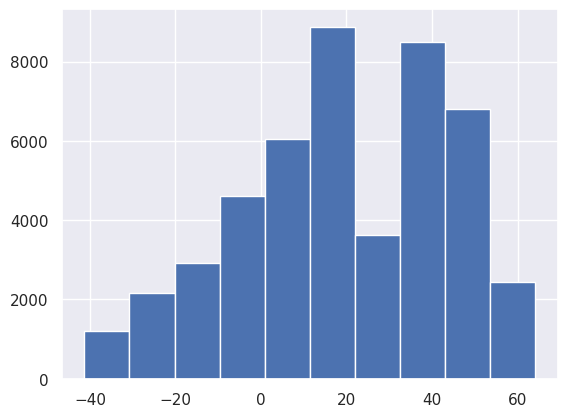

In [64]:
plt.hist(weather_data["latitude"])

In [65]:
lat_band_1 = weather_data[(weather_data["latitude"] >= 20) & (weather_data["latitude"] <= 22)]
lat_band_2 = weather_data[(weather_data["latitude"] >= 25) & (weather_data["latitude"] <= 30)]
lat_band_3 = weather_data[(weather_data["latitude"] >= 30) & (weather_data["latitude"] <= 35)]

In [66]:
lat_band_1['minutes'] = lat_band_1['last_updated'].apply(get_minutes)
least_minutes = lat_band_1["minutes"].min()
lat_band_1["minutes"] = lat_band_1["minutes"] - least_minutes

lat_band_2['minutes'] = lat_band_2['last_updated'].apply(get_minutes)
least_minutes = lat_band_2["minutes"].min()
lat_band_2["minutes"] = lat_band_2["minutes"] - least_minutes

lat_band_3['minutes'] = lat_band_3['last_updated'].apply(get_minutes)
least_minutes = lat_band_3["minutes"].min()
lat_band_3["minutes"] = lat_band_3["minutes"] - least_minutes

<ipython-input-66-f482415491da>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lat_band_1['minutes'] = lat_band_1['last_updated'].apply(get_minutes)
<ipython-input-66-f482415491da>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lat_band_1["minutes"] = lat_band_1["minutes"] - least_minutes
<ipython-input-66-f482415491da>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentati

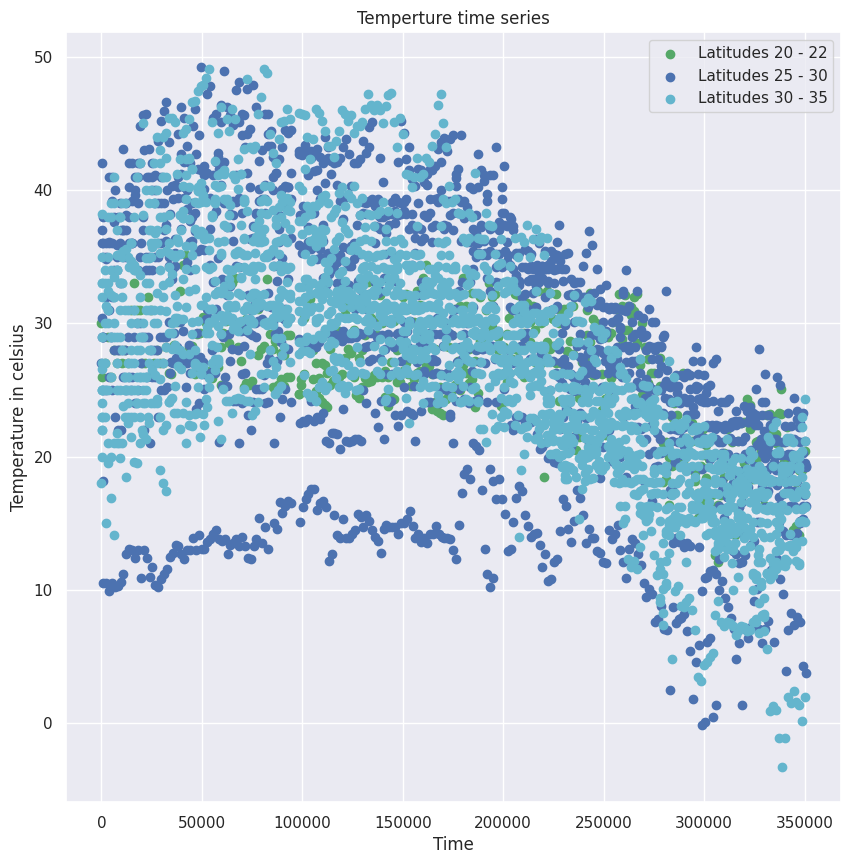

In [67]:
plt.figure(figsize=(10, 10))
plt.scatter(lat_band_1["minutes"], lat_band_1["temperature_celsius"], c='g', label='Latitudes 20 - 22')
plt.scatter(lat_band_2["minutes"], lat_band_2["temperature_celsius"], c='b', label='Latitudes 25 - 30')
plt.scatter(lat_band_3["minutes"], lat_band_3["temperature_celsius"], c='c', label='Latitudes 30 - 35')
plt.xlabel("Time")
plt.ylabel("Temperature in celsius")
plt.title("Temperture time series")
plt.legend()
plt.show()

We clearly see trends in the temperature with respect to time. But these trends depend on the latitude bands in which they are present. This is a very important thing to note. We can model temperature as a function of time, where the function that we use to model this temperature is itself a function of the latitude.